In [1]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... don

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
adata_gex=sc.read ('/Users/emily/Library/CloudStorage/OneDrive-NewcastleUniversity/Projects/COVID-19/Second Batch/Data analysis/Jupyter/renal_covid_19_gex_myeloid_soupX_QC.h5ad')

/Users/emily/miniconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
adata_gex

AnnData object with n_obs × n_vars = 220907 × 33559

In [5]:
adata_gex.X.max()

14004.289469167865

In [6]:
target_genes = pd.read_csv ('/Users/emily/Library/CloudStorage/OneDrive-NewcastleUniversity/Projects/COVID-19/Second Batch/Data analysis/Jupyter/Macrophage_stim_markers_Human_updated.csv')

In [7]:
target_genes.head()

,GC,HDL,IFNb,IFNg,IFNg_TNF,IL10,IL13,IL4,IL4_upLPS,TNF,sLPS,sLPS_IC,sLPS_IFNg,upLPS,upLPS_IC
0,GLDN,LOC653352,C9orf38,GBP5,CSF1,HCFC1R1,ALOX15,ALOX15,ALOX15,CCL5,CXCR7,MYBPC3,GBP5,PCNX,SRPX
1,SRPX,YIPF6,ACY3,LOC400759,CCL5,SPOCD1,FOXQ1,FOXQ1,IL17RB,CD82,PTPRF,IL2RA,PCNX,ANG,TBL2
2,ZBTB16,MOGAT1,MGAT4B,CXCL9,C20orf123,P8,PPP1R14A,PPP1R14A,CCL26,NFS1,FAM108C1,CXCR7,GCH1,RNASE4,LRG1
3,TBC1D16,PRPF40A,LOC732424,GBP1,IL2RG,ADAMTSL4,DHRS11,MAOA,WNT5A,SLC5A3,KIAA1199,PCNX,LOC399715,SPARC,MS4A6E
4,LOC647108,LOC642033,PITX2,GBP4,GBP4,CTSG,IL1R1,SOCS1,TGM2,RCN1,EMR3,MLLT6,MYBPC3,FTHL12,C1S


In [8]:
mdata = sc.read ('/Users/emily/Library/CloudStorage/OneDrive-NewcastleUniversity/Projects/COVID-19/Second Batch/Data analysis/Jupyter/renal_covid_19_gex_myeloid_soupX_QC_orig.ident_annotated_levle23.h5ad')

/Users/emily/miniconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [9]:
adata = adata_gex[adata_gex.obs.index.isin(mdata.obs.index)]

In [10]:
adata

View of AnnData object with n_obs × n_vars = 126622 × 33559

In [11]:
mdata

AnnData object with n_obs × n_vars = 126622 × 1215
    obs: 'annotation22_ES', 'centre', 'sample_id', 'sample_id_broad', 'sample_date', 'sample_date_yr', 'pool', 'pool_broad', 'haniffa_broad_predLabel', 'orig.ident', 'merged_souporcell_cluster', 'merged_souporcell_status', 'patient_id', 'case_control', 'WHO_severity', 'sex', 'calc_age', 'discharge_date', 'date_positive_swab', 'date_first_symptoms', 'admission_date', 'ethnicity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_0.8', '5_subcluster', '9_subcluster', 'annotation', 'annotation23_ES', 'annotation24_ES', 'annot3', 'annot2', 'annot1', 'leiden_0.5', 'annot4'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '5_subcluster_colors', '9_subcluster', '9_subcluster_colors', 'WHO_severity_colors', 'X_pca_harmony_orig.ident', 'annot1_colors', 'annot2_colors', 'annot3_colors', '

In [12]:
adata.obs['annot4'] = mdata.obs['annot4']
adata.obs['centre'] = mdata.obs['centre']
adata.obs['case_control'] = mdata.obs['case_control']
adata.obs['WHO_severity'] = mdata.obs['WHO_severity']
adata.obs['patient_id'] = mdata.obs['patient_id']

/var/folders/8j/9l3m415n6lvf67bnlp8t9k480000gq/T/ipykernel_49081/1107364442.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['annot4'] = mdata.obs['annot4']


In [13]:
adata.obs['case_control'].unique()

['NEGATIVE', 'nan', 'POSITIVE', 'RECOVERY']
Categories (4, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY', 'nan']

In [14]:
adata = adata[adata.obs['case_control']=='POSITIVE']

In [15]:
adata.obs['case_control'].unique()

['POSITIVE']
Categories (1, object): ['POSITIVE']

In [16]:
adata.obs['centre'].unique()

['NCL', 'Cambridge']
Categories (2, object): ['Cambridge', 'NCL']

In [17]:
adata.obs['WHO_severity'].unique()

['severe', 'critical', 'moderate', 'mild']
Categories (4, object): ['critical', 'mild', 'moderate', 'severe']

In [18]:
adata.obs['annot4'].unique()

['CD14mono', 'CD14mono_IFN', 'RBC', 'CD16mono', 'CD14mono_anti_inflammatory', ..., 'Platelet', 'Int.mono', 'DC3_IFN', 'CD16mono_IFN', 'ASDC']
Length: 17
Categories (17, object): ['ASDC', 'CD14mono', 'CD14mono_IFN', 'CD14mono_activated', ..., 'Int.mono', 'Platelet', 'RBC', 'pDC']

In [19]:
adata.obs['annot4'] = adata.obs['annot4'].str.replace('CD14mono_activated','CD14mono')
adata.obs['annot4'] = adata.obs['annot4'].str.replace('CD14mono_anti_inflammatory','CD14mono_alt_act')

/var/folders/8j/9l3m415n6lvf67bnlp8t9k480000gq/T/ipykernel_49081/2951339596.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['annot4'] = adata.obs['annot4'].str.replace('CD14mono_activated','CD14mono')


In [20]:
list(adata.obs['annot4'].unique())

['CD14mono',
 'CD14mono_IFN',
 'RBC',
 'CD16mono',
 'CD14mono_alt_act',
 'HSPC',
 'DC3',
 'CD16mono_C1',
 'DC2',
 'DC1',
 'pDC',
 'Platelet',
 'Int.mono',
 'DC3_IFN',
 'CD16mono_IFN',
 'ASDC']

In [21]:
adata = adata[adata.obs['annot4'].isin(['CD14mono','CD14mono_IFN', 'CD14mono_alt_act'])]

In [22]:
list(adata.obs['annot4'].unique())

['CD14mono', 'CD14mono_IFN', 'CD14mono_alt_act']

In [23]:
'C116' in list(adata.obs['patient_id'].unique())

False

In [24]:
'C139' in list(adata.obs['patient_id'].unique())

False

In [25]:
'C141' in list(adata.obs['patient_id'].unique())

True

In [26]:
adata.obs['annot4'].unique()

array(['CD14mono', 'CD14mono_IFN', 'CD14mono_alt_act'], dtype=object)

In [27]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/Users/emily/miniconda3/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [28]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['ribo'] = adata.var_names.str.startswith(("Rps","Rpl"))
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'],percent_top=None, log1p=False, inplace=True)

In [29]:
adata= adata[adata.obs.pct_counts_mt < 10, :]
adata

View of AnnData object with n_obs × n_vars = 39528 × 19580
    obs: 'annot4', 'centre', 'case_control', 'WHO_severity', 'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [30]:
adata.X.max()

3685.821967746818

In [31]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/emily/miniconda3/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [32]:
sc.pp.log1p(adata)

In [33]:
target_genes.head()

,GC,HDL,IFNb,IFNg,IFNg_TNF,IL10,IL13,IL4,IL4_upLPS,TNF,sLPS,sLPS_IC,sLPS_IFNg,upLPS,upLPS_IC
0,GLDN,LOC653352,C9orf38,GBP5,CSF1,HCFC1R1,ALOX15,ALOX15,ALOX15,CCL5,CXCR7,MYBPC3,GBP5,PCNX,SRPX
1,SRPX,YIPF6,ACY3,LOC400759,CCL5,SPOCD1,FOXQ1,FOXQ1,IL17RB,CD82,PTPRF,IL2RA,PCNX,ANG,TBL2
2,ZBTB16,MOGAT1,MGAT4B,CXCL9,C20orf123,P8,PPP1R14A,PPP1R14A,CCL26,NFS1,FAM108C1,CXCR7,GCH1,RNASE4,LRG1
3,TBC1D16,PRPF40A,LOC732424,GBP1,IL2RG,ADAMTSL4,DHRS11,MAOA,WNT5A,SLC5A3,KIAA1199,PCNX,LOC399715,SPARC,MS4A6E
4,LOC647108,LOC642033,PITX2,GBP4,GBP4,CTSG,IL1R1,SOCS1,TGM2,RCN1,EMR3,MLLT6,MYBPC3,FTHL12,C1S


In [34]:
len(target_genes.columns)

15

In [35]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [36]:
overlap =[]
for i in range(0, len(target_genes.columns)):
    sc.tl.score_genes(adata, list(target_genes[target_genes.columns[i]]), ctrl_size=50, gene_pool=None, n_bins=25, score_name=(target_genes.columns[i]), random_state=0, copy=False)
    print(target_genes.columns[i])
    print(list(target_genes[target_genes.columns[i]]))
    get_le = intersection(list(target_genes[target_genes.columns[i]]),list(adata.var.index))
    overlap.append(get_le)

GC
['GLDN', 'SRPX', 'ZBTB16', 'TBC1D16', 'LOC647108', 'DAAM2', 'TFCP2L1', 'ADAMTS2', 'CFH', 'SESN1', 'PDGFD', 'METTL7A', 'MFGE8', 'PDGFC', 'AGRP', 'PICK1', 'CPM', 'SAP30', 'PDK4', 'EPDR1', 'FCGR3A', 'XLKD1', 'MS4A6E', 'ABLIM3', 'FLRT2', 'MAN1A1', 'DACT1', 'SHE', 'ALOX15B', 'PIK3IP1', 'PON2', 'TCN2', 'SERPINF1', 'EIF4A3', 'RNASE2', 'ALCAM', 'GLUL', 'C5orf62', 'LOC652541', 'IDH1', 'GIMAP1', 'EPS8', 'ECHDC3', 'MS4A4A', 'SLC40A1', 'AMY2B', 'TPST1', 'ELANE', 'CLIC2', 'CTNS', 'ADORA3', 'SHMT1', 'MPZL2', 'P2RY12', 'PLCH1', 'GPRC5C', 'GADD45B', 'FAH', 'TIMP4', 'KLF9', 'FBLN5', 'C1QA', 'ANTXR2', 'PRKCABP', 'CCL18', 'GAL3ST4', 'ANKS1A', 'C1QB', 'SNTB1', 'CLTC', 'GFRA2', 'SIGLEC10', 'SH3PXD2B', 'ACSS1', 'IL1R2', 'TLR4', 'GBGT1', 'SLED1', 'PEBP1', 'BRPF3', 'TEX2', 'BLVRB', 'ITGA9', 'DISP1', 'RNASE3', 'SOCS1', 'TSC22D3', 'OLAH', 'SLC1A3', 'SEPP1', 'KIF16B', 'C10orf128', 'LOC653631', 'AMY2A', 'BCL2L11', 'CD164', 'TXNIP', 'TFPI', 'F13A1', 'CD7']
HDL
['LOC653352', 'YIPF6', 'MOGAT1', 'PRPF40A', 'LOC642

In [37]:
len(overlap)

15

In [38]:
import csv
with open('leading_edge_genes.csv', 'w', newline='') as output:
    writer = csv.writer(output)
    writer.writerows(overlap)

In [39]:
scores = adata.obs[[s for s in list(target_genes.columns)]]
scores['group'] = adata.obs['annot4']
scores.groupby('group').mean()

/var/folders/8j/9l3m415n6lvf67bnlp8t9k480000gq/T/ipykernel_49081/3488997215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['group'] = adata.obs['annot4']


,GC,HDL,IFNb,IFNg,IFNg_TNF,IL10,IL13,IL4,IL4_upLPS,TNF,sLPS,sLPS_IC,sLPS_IFNg,upLPS,upLPS_IC
group,,,,,,,,,,,,,,,
CD14mono,-0.011113,-0.017692,-0.053327,0.075996,0.026093,-0.043408,-0.011750,-0.082306,-0.025645,0.110205,0.056972,0.080936,-0.000069,0.089750,0.049164
CD14mono_IFN,0.011561,-0.006255,0.004009,0.221372,0.083443,-0.039510,-0.020761,-0.082813,-0.021617,0.155677,0.059363,0.083257,0.033785,0.106321,0.080473
CD14mono_alt_act,0.074504,-0.001054,-0.026916,0.068890,0.021795,-0.043767,-0.003302,-0.071377,-0.020701,0.119592,0.049259,0.073915,-0.015420,0.088530,0.098375


In [40]:
adata.obs['annot4'].unique()

array(['CD14mono', 'CD14mono_IFN', 'CD14mono_alt_act'], dtype=object)

Text(0.5, 103.24999999999997, 'timeline')

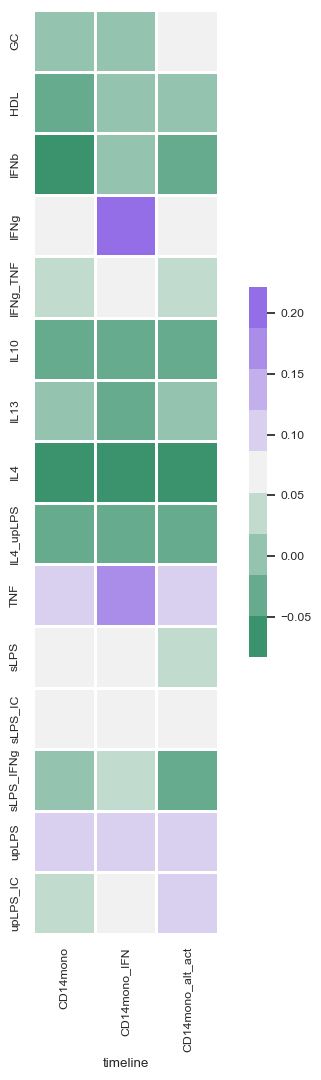

In [41]:
import matplotlib.pyplot as plt
sns.set(font_scale=0.8) # font size 2
fig, ax = plt.subplots(figsize=(8,12))  
pal = sns.diverging_palette(150, 275, s=80, l=55, n=9)
score_mean = scores.groupby('group').mean()
g = sns.heatmap(score_mean.T, cmap=pal,  annot=False,linewidths=1,  square=True, cbar_kws={"shrink": 0.4},annot_kws={"size": 10})
#plt.ylabel("WHO_temp_severity")
plt.xlabel("timeline")
#plt.savefig('./CD16mono_final.png',dpi=300,bbox_inches='tight')

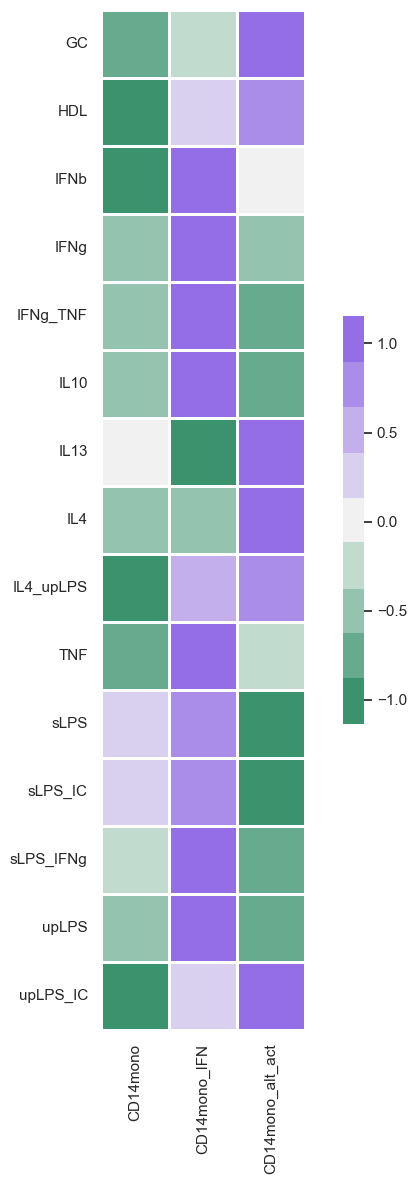

In [42]:
import matplotlib.pyplot as plt
sns.set(font_scale=1) # font size 2
fig, ax = plt.subplots(figsize=(8,12))  
pal = sns.diverging_palette(150, 275, s=80, l=55, n=9)
score_mean =scores.groupby('group').mean()
#Z_score the data
score_mean= (score_mean - score_mean.mean())/score_mean.std()

max_val = (max((np.array(score_mean)).max(0)))
min_val = (min((np.array(score_mean)).min(0)))
mid_val = (max((np.array(score_mean)).max(0))) - ((max((np.array(score_mean)).max(0))) - (min((np.array(score_mean)).min(0))))/2
g = sns.heatmap(score_mean.T, cmap=pal,  annot=False,vmin=min_val, vmax=max_val, linewidths=1, center=mid_val, square=True, cbar_kws={"shrink": 0.4},annot_kws={"size": 78})
#plt.ylabel("WHO_temp_severity")
plt.xlabel("")
plt.tight_layout()
#plt.savefig('/home/jovyan/scripts/renal_covid_19/sig_gene_plot/cytokine_sig_allmono_wave2_pos.pdf')

In [43]:
scores.head()

,GC,HDL,IFNb,IFNg,IFNg_TNF,IL10,IL13,IL4,IL4_upLPS,TNF,sLPS,sLPS_IC,sLPS_IFNg,upLPS,upLPS_IC,group
UK-CIC10689738+UK-CIC10690026_AAATGCCAGAGACTTA-1,0.034317,-0.017323,0.023551,0.019164,-0.025837,-0.041031,0.015281,-0.120103,-0.016803,0.110882,0.094271,0.162591,0.001936,0.195611,0.082519,CD14mono
UK-CIC10689738+UK-CIC10690026_AAATGCCAGAGGACGG-1,0.022264,-0.085126,-0.128042,0.136736,0.021000,-0.007283,-0.034201,-0.071607,-0.025965,0.080410,0.021033,0.152550,-0.018947,0.093352,0.134770,CD14mono
UK-CIC10689738+UK-CIC10690026_AAATGCCCAGGCGATA-1,0.085123,-0.090876,-0.034714,-0.028366,0.005222,0.023730,-0.077336,-0.073442,-0.019031,0.084618,0.038889,0.065227,-0.052042,0.109249,0.099359,CD14mono
UK-CIC10689738+UK-CIC10690026_AAATGCCGTTGGAGGT-1,-0.044376,0.046653,-0.049315,0.192087,0.111335,-0.104231,-0.037624,-0.057647,0.006037,0.256537,-0.010080,0.014995,-0.049831,0.109748,0.089172,CD14mono_IFN
UK-CIC10689738+UK-CIC10690026_AACCATGAGGCAGGTT-1,0.114805,-0.004472,-0.110008,0.138484,-0.006548,-0.136296,0.054676,-0.052371,-0.044236,0.045986,0.030333,0.065571,-0.017966,0.085258,0.031938,CD14mono


In [47]:
new_scores =scores[[
     'upLPS',
'sLPS',
'sLPS_IFNg',
'IFNg',
'IFNg_TNF',
'TNF',
    'IL13',
'IL4',
'IL4_upLPS',
'sLPS_IC',
'upLPS_IC',
'IL10',
'GC',
'HDL',
'IFNb','group']]

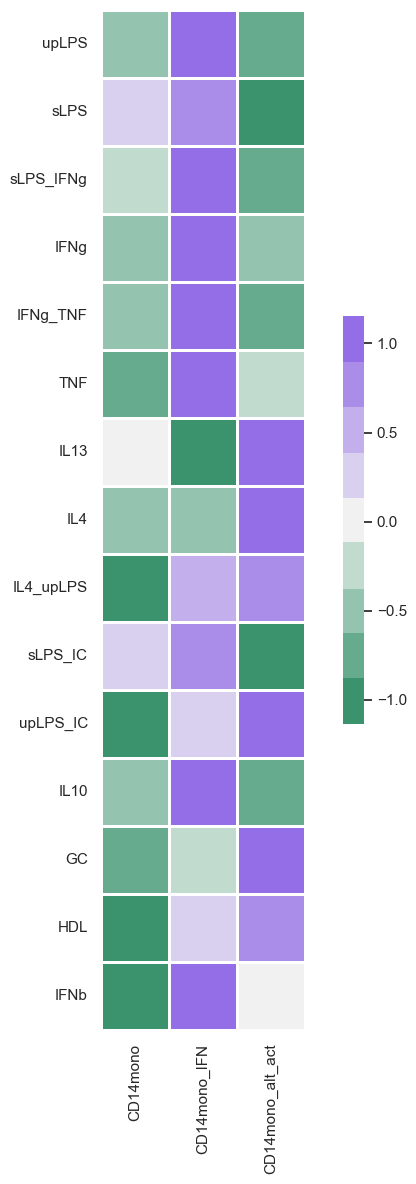

In [48]:
import matplotlib.pyplot as plt
sns.set(font_scale=1) # font size 2
fig, ax = plt.subplots(figsize=(8,12))  
pal = sns.diverging_palette(150, 275, s=80, l=55, n=9)
score_mean = new_scores.groupby('group').mean()
#Z_score the data
score_mean= (score_mean - score_mean.mean())/score_mean.std()

max_val = (max((np.array(score_mean)).max(0)))
min_val = (min((np.array(score_mean)).min(0)))
mid_val = (max((np.array(score_mean)).max(0))) - ((max((np.array(score_mean)).max(0))) - (min((np.array(score_mean)).min(0))))/2
g = sns.heatmap(score_mean.T, cmap=pal,  annot=False,vmin=min_val, vmax=max_val, linewidths=1, center=mid_val, square=True, cbar_kws={"shrink": 0.4},annot_kws={"size": 78})
#plt.ylabel("WHO_temp_severity")
plt.xlabel("")
plt.tight_layout()
#plt.savefig('/home/jovyan/scripts/renal_covid_19/sig_gene_plot/cytokine_sig_allmono_wave2_pos.pdf')

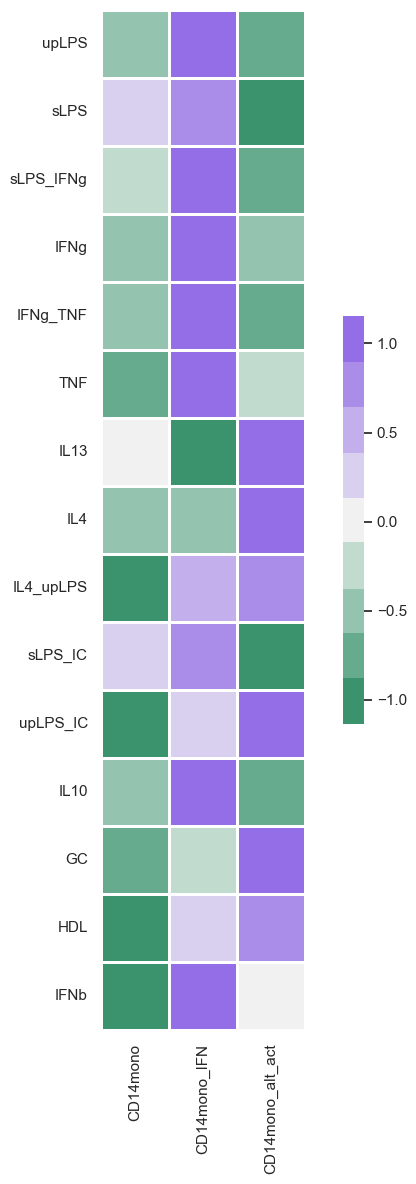

In [59]:
import matplotlib.pyplot as plt
sns.set(font_scale=1) # font size 2
fig, ax = plt.subplots(figsize=(8,12))  
pal = sns.diverging_palette(150, 275, s=80, l=55, n=9)
score_mean = new_scores.groupby('group').mean()
#Z_score the data
score_mean= (score_mean - score_mean.mean())/score_mean.std()

max_val = (max((np.array(score_mean)).max(0)))
min_val = (min((np.array(score_mean)).min(0)))
mid_val = (max((np.array(score_mean)).max(0))) - ((max((np.array(score_mean)).max(0))) - (min((np.array(score_mean)).min(0))))/2
g = sns.heatmap(score_mean.T, cmap=pal,  annot=False,vmin=min_val, vmax=max_val, linewidths=1, center=mid_val, square=True, cbar_kws={"shrink": 0.4},annot_kws={"size": 78})
#plt.ylabel("WHO_temp_severity")
plt.xlabel("")
plt.tight_layout()
#plt.savefig('/home/jovyan/scripts/renal_covid_19/sig_gene_plot/cytokine_sig_allmono_wave2_pos.pdf')
plt.savefig('your_plot.pdf', format='pdf')

In [49]:
score_mean.head()

,upLPS,sLPS,sLPS_IFNg,IFNg,IFNg_TNF,TNF,IL13,IL4,IL4_upLPS,sLPS_IC,upLPS_IC,IL10,GC,HDL,IFNb
group,,,,,,,,,,,,,,,
CD14mono,-0.514871,0.335914,-0.244990,-0.535576,-0.513788,-0.761711,0.021531,-0.537654,-1.137039,0.322098,-1.077560,-0.499520,-0.813757,-1.099482,-0.972759
CD14mono_IFN,1.152523,0.788794,1.099728,1.153716,1.152448,1.132419,-1.010592,-0.616157,0.394288,0.799258,0.179408,1.151347,-0.302592,0.244202,1.025179
CD14mono_alt_act,-0.637652,-1.124707,-0.854739,-0.618140,-0.638660,-0.370707,0.989061,1.153811,0.742751,-1.121356,0.898152,-0.651827,1.116350,0.855281,-0.052421


In [50]:
to_plot = score_mean.T

In [51]:
to_plot.head()

group,CD14mono,CD14mono_IFN,CD14mono_alt_act
upLPS,-0.514871,1.152523,-0.637652
sLPS,0.335914,0.788794,-1.124707
sLPS_IFNg,-0.244990,1.099728,-0.854739
IFNg,-0.535576,1.153716,-0.618140
IFNg_TNF,-0.513788,1.152448,-0.638660


In [57]:
to_plot.to_csv('/Users/emily/Library/CloudStorage/OneDrive-NewcastleUniversity/Projects/COVID-19/Second Batch/Data analysis/Jupyter/genemodulescores.csv')